# German Traffic Sign Recognition Benchmark (GTSRB)

In [35]:
import os
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [59]:
# Construct the path to the image
base_path = r'C:/Users/kfrei/OneDrive - Ostbayerische Technische Hochschule Regensburg/Desktop/GTSRB/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images'
image_file = '00000/00000_00011.ppm'
image_path = os.path.join(base_path, image_file)

In [60]:
# Load the CSV file
file_path = os.path.join(base_path, '00000/GT-00000.csv')
labels_df = pd.read_csv(file_path, delimiter=';')

In [61]:
print(labels_df.columns)

Index(['Filename', 'Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2',
       'ClassId'],
      dtype='object')


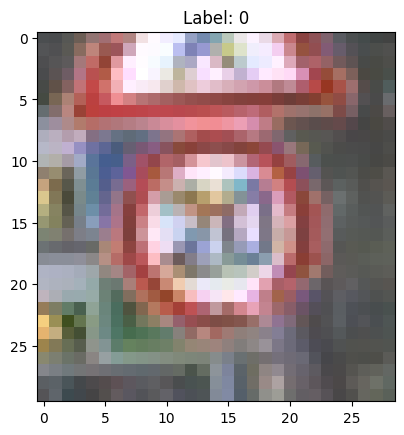

In [62]:
# Example: Display the first image and its label
for index, row in labels_df.iterrows():
    image_path = os.path.join(base_path, f"00000/{row['Filename']}")
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(f"Label: {row['ClassId']}")
    plt.show()
    break

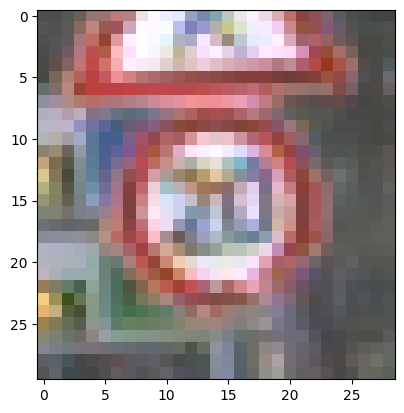

In [63]:
# Load the image
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.show()

In [64]:
# Convert to numpy array
image_np = np.array(image)
print(image_np.shape)

(30, 29, 3)


In [65]:
for i in range(1, 50):
	formatted_number = f"{i:05}"  # Formats the number with leading zeros, total width of 5
	image_path = os.path.join(base_path, f"{formatted_number}.ppm")
	image = Image.open(image_path)
	image_np = np.array(image)
	print(f"image {i:>5}:\t{image_np.shape}")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\kfrei\\OneDrive - Ostbayerische Technische Hochschule Regensburg\\Desktop\\GTSRB\\GTSRB_Final_Training_Images\\GTSRB\\Final_Training\\Images\\00001.ppm'

In [33]:
target_size = (64, 64)

for i in range(1, 20):
    formatted_number = f"{i:05}"  # Formats the number with leading zeros, total width of 5
    image_path = os.path.join(base_path, f"{formatted_number}.ppm")
    image = Image.open(image_path)

    # Resize the image using the LANCZOS filter
    resized_image = image.resize(target_size, Image.Resampling.LANCZOS)  # Updated to use Resampling.LANCZOS
    image_np = np.array(resized_image)

    # Optionally, you can display the resized image to verify the process
    # plt.imshow(resized_image)
    # plt.show()

    print(f"image {i:>5}:\t{image_np.shape}")

image     1:	(64, 64, 3)
image     2:	(64, 64, 3)
image     3:	(64, 64, 3)
image     4:	(64, 64, 3)
image     5:	(64, 64, 3)
image     6:	(64, 64, 3)
image     7:	(64, 64, 3)
image     8:	(64, 64, 3)
image     9:	(64, 64, 3)
image    10:	(64, 64, 3)
image    11:	(64, 64, 3)
image    12:	(64, 64, 3)
image    13:	(64, 64, 3)
image    14:	(64, 64, 3)
image    15:	(64, 64, 3)
image    16:	(64, 64, 3)
image    17:	(64, 64, 3)
image    18:	(64, 64, 3)
image    19:	(64, 64, 3)


## CNN

In [66]:
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [67]:
# Assuming you have all images in `images` and labels in `labels`
images = np.array([np.array(Image.open(os.path.join(base_path, f"{i:05}.ppm")).resize(target_size, Image.Resampling.LANCZOS)) for i in range(1, 1001)])
labels = np.array([...])  # Your labels here, make sure they are in the same order as images

# Normalize images
images = images / 255.0

# Split data
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\kfrei\\OneDrive - Ostbayerische Technische Hochschule Regensburg\\Desktop\\GTSRB\\GTSRB_Final_Training_Images\\GTSRB\\Final_Training\\Images\\00001.ppm'

In [68]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(43, activation='softmax')  # Assuming 43 classes in the GTSRB dataset
])

model.summary()

C:\Users\kfrei\venv\SE4AI_project\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,132,587 (8.14 MB)

 Trainable params: 2,132,587 (8.14 MB)

 Non-trainable params: 0 (0.00 B)

    1. Input Layer: Accepts images of size 64x64 with 3 channels (RGB).
    2. First Convolutional Layer: Applies 32 filters of size 3x3 with ReLU activation. This layer will help in detecting basic features like edges and textures.
    3. First Pooling Layer: Applies max pooling with a 2x2 filter, reducing spatial dimensions (width and height) by half.
    4. Second Convolutional Layer: Applies 64 filters of size 3x3 with ReLU activation, capturing more complex features.
    5. Second Pooling Layer: Further reduces dimensionality with 2x2 max pooling.
    6. Third Convolutional Layer: Uses 128 filters of size 3x3 with ReLU activation, enhancing the ability to recognize high-level features in the input.
    7. Third Pooling Layer: Applies 2x2 max pooling, continuing to reduce data dimensionality.
    8. Fourth Convolutional Layer: Employs 256 filters of size 3x3 with ReLU activation, allowing for even deeper feature extraction.
    9. Fourth Pooling Layer: A final 2x2 max pooling step, minimizing spatial dimensions before flattening.
    10. Flattening Layer: Converts the 3D feature maps into 1D feature vectors, necessary for the fully connected layers.
    11. First Fully Connected Layer: A dense layer with 1024 neurons and ReLU activation, significantly increasing the network's learning capacity.
    12. Dropout: Drops 50% of the activations randomly to reduce overfitting.
    13. Second Fully Connected Layer: Continues with 512 neurons and ReLU activation, further processing the learned features.
    14. Third Fully Connected Layer: A smaller dense layer with 256 neurons, still using ReLU activation.
    15. Fourth Fully Connected Layer: Reduces down to 128 neurons, focusing the network's outputs towards the final classification layer.
    16. Dropout: Another dropout layer to avoid overfitting.
    17. Output Layer: A dense layer with a number of neurons equal to the number of classes in your dataset, using softmax activation for multi-class classification.

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)